<a href="https://colab.research.google.com/github/dievikson/HypatiaAcademy/blob/master/06_14_2024_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from pylab import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

student = pd.read_csv("https://raw.githubusercontent.com/werowe/HypatiaAcademy/master/ml/Student_Performance.csv")

student

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
student.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [5]:
student=student.dropna()
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [12]:
student.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [13]:
y=student['Performance Index']
type(y)

pandas.core.series.Series

In [15]:
x1 = student['Hours Studied']
x1


0       7
1       4
2       8
3       5
4       7
       ..
9995    1
9996    7
9997    6
9998    9
9999    7
Name: Hours Studied, Length: 10000, dtype: int64

In [16]:
x2 = student['Previous Scores']
x2

0       99
1       82
2       51
3       52
4       75
        ..
9995    49
9996    64
9997    83
9998    97
9999    74
Name: Previous Scores, Length: 10000, dtype: int64

In [17]:
x3 = student['Extracurricular Activities']
x3

0       Yes
1        No
2       Yes
3       Yes
4        No
       ... 
9995    Yes
9996    Yes
9997    Yes
9998    Yes
9999     No
Name: Extracurricular Activities, Length: 10000, dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

x3=le.fit_transform(student['Extracurricular Activities'])

x3

array([1, 0, 1, ..., 1, 1, 0])

In [19]:
x4 = student['Sleep Hours']
x4



0       9
1       4
2       7
3       5
4       8
       ..
9995    4
9996    8
9997    8
9998    7
9999    8
Name: Sleep Hours, Length: 10000, dtype: int64

In [20]:
x5 = student['Sample Question Papers Practiced']
x5

0       1
1       2
2       2
3       2
4       5
       ..
9995    2
9996    5
9997    5
9998    0
9999    1
Name: Sample Question Papers Practiced, Length: 10000, dtype: int64

In [21]:
import numpy as np

X=np.column_stack((x1,x2,x3,x4,x5))
X

array([[ 7, 99,  1,  9,  1],
       [ 4, 82,  0,  4,  2],
       [ 8, 51,  1,  7,  2],
       ...,
       [ 6, 83,  1,  8,  5],
       [ 9, 97,  1,  7,  0],
       [ 7, 74,  0,  8,  1]])

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)


In [23]:
xtrain.shape

(8000, 5)

In [24]:
ytrain.shape

(8000,)

In [25]:
X[0]

array([ 7, 99,  1,  9,  1])

In [26]:
np.column_stack([xtrain,ytrain])

array([[ 3., 51.,  1.,  4.,  1., 30.],
       [ 2., 96.,  1.,  6.,  3., 71.],
       [ 3., 89.,  1.,  4.,  2., 67.],
       ...,
       [ 6., 74.,  0.,  6.,  9., 62.],
       [ 5., 91.,  0.,  4.,  4., 74.],
       [ 4., 61.,  1.,  9.,  9., 47.]])

In [28]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression()

In [29]:
np.set_printoptions(suppress=True, precision=10)

print('Coefficients: \n', reg.coef_)
print('\n Intercept: \n', reg.intercept_)



Coefficients: 
 [2.8540739455 1.0181660376 0.6101344666 0.4921551819 0.1929602839]

 Intercept: 
 -34.13604315510959


In [30]:
ytrain

8829    30.0
5124    71.0
4282    67.0
8064    47.0
924     42.0
        ... 
6497    73.0
8743    55.0
6472    62.0
2936    74.0
5687    47.0
Name: Performance Index, Length: 8000, dtype: float64

In [31]:
xtrain.shape

(8000, 5)

In [32]:
xtrain[0,0]

3

In [33]:
xtrain[0]

array([ 3, 51,  1,  4,  1])

In [34]:
ypred = reg.predict(xtest)

In [35]:
ypred[0]

22.190246512268686

In [36]:
reg.coef_[0] * xtrain[0,0] + reg.coef_[1] * xtrain[0,1] + reg.coef_[2] * xtrain[0,2] + reg.coef_[3] * xtrain[0,3] + reg.coef_[4] * xtrain[0,4] + reg.intercept_

29.12436207612764

In [37]:

xtrain[0]


array([ 3, 51,  1,  4,  1])

In [39]:
xtest[0]

array([ 1, 47,  1,  9,  3])

In [38]:
ytest.shape

(2000,)

In [ ]:
ypred.shape

In [40]:
print('Mean squared error: %.2f' % mean_squared_error(ytest, ypred))

print('Coefficient of determination: %.2f' % r2_score(ytest, ypred))

Mean squared error: 4.18
Coefficient of determination: 0.99


In [44]:
Z=np.column_stack([xtest,ytest,ypred])
ytests=ytest[0:20]
ypreds=ypred[0:20]

xs=np.arange(0,20)

In [45]:
xs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [46]:
ytest.shape

(2000,)

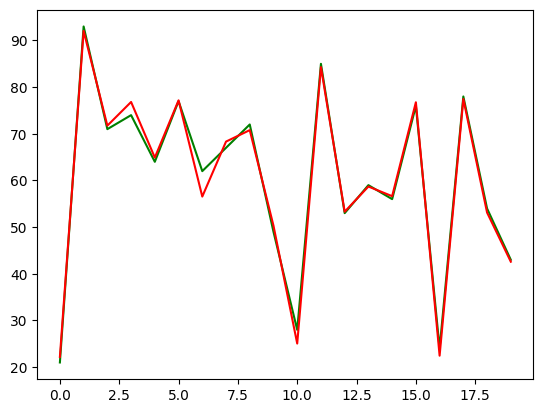

In [47]:
plt.plot(xs,ytests,color='green')
plt.plot(xs,ypreds,color='red')
plt.show()

In [48]:

np.arange(0,20)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])